In [1]:
%matplotlib inline
import imp
import utils
from utils import *
from __future__ import division, print_function

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#path = "data/ml-20m/"
path = "data/ml-small/"
model_path = path + 'models/'
if not os.path.exists(model_path): 
    os.mkdir(model_path)
batch_size=64

## 建立数据

We're working with the movielens data, which contains one rating per row, like this:

使用`movielens`的数据，每一行数据包含一个用户对某部电影的评分

In [3]:
ratings = pd.read_csv(path + "ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
len(ratings)

100004

Just for display purposes, let's read in the movie names too.

为了打印出目的，需要读入电影名称

In [5]:
# id-》title 字典
movie_names = pd.read_csv(path+"movies.csv").set_index('movieId')['title'].to_dict()

In [6]:
movie_names

{1: 'Toy Story (1995)',
 2: 'Jumanji (1995)',
 3: 'Grumpier Old Men (1995)',
 4: 'Waiting to Exhale (1995)',
 5: 'Father of the Bride Part II (1995)',
 6: 'Heat (1995)',
 7: 'Sabrina (1995)',
 8: 'Tom and Huck (1995)',
 9: 'Sudden Death (1995)',
 10: 'GoldenEye (1995)',
 11: 'American President, The (1995)',
 12: 'Dracula: Dead and Loving It (1995)',
 13: 'Balto (1995)',
 14: 'Nixon (1995)',
 15: 'Cutthroat Island (1995)',
 16: 'Casino (1995)',
 17: 'Sense and Sensibility (1995)',
 18: 'Four Rooms (1995)',
 19: 'Ace Ventura: When Nature Calls (1995)',
 20: 'Money Train (1995)',
 21: 'Get Shorty (1995)',
 22: 'Copycat (1995)',
 23: 'Assassins (1995)',
 24: 'Powder (1995)',
 25: 'Leaving Las Vegas (1995)',
 26: 'Othello (1995)',
 27: 'Now and Then (1995)',
 28: 'Persuasion (1995)',
 29: 'City of Lost Children, The (Cité des enfants perdus, La) (1995)',
 30: 'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
 31: 'Dangerous Minds (1995)',
 32: 'Twelve Monkeys (a.k.a. 12 Monkeys) (199

In [7]:
users = ratings.userId.unique() # 所有不重复的用户Id

In [8]:
movies = ratings.movieId.unique() # 所有不重复的电影Id

In [9]:
movies

array([  31, 1029, 1061, ...,  129, 4736, 6425], dtype=int64)

In [10]:
users

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,
        19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 184, 185

In [11]:
len(movies)

9066

In [12]:
userid2idx = {o:i for i,o in enumerate(users)} # userid 对应的数字id
movieid2idx = {o:i for i,o in enumerate(movies)} # movie 对应的数字id

In [13]:
movieid2idx

{31: 0,
 1029: 1,
 1061: 2,
 1129: 3,
 1172: 4,
 1263: 5,
 1287: 6,
 1293: 7,
 1339: 8,
 1343: 9,
 1371: 10,
 1405: 11,
 1953: 12,
 2105: 13,
 2150: 14,
 2193: 15,
 2294: 16,
 2455: 17,
 2968: 18,
 3671: 19,
 10: 20,
 17: 21,
 39: 22,
 47: 23,
 50: 24,
 52: 25,
 62: 26,
 110: 27,
 144: 28,
 150: 29,
 153: 30,
 161: 31,
 165: 32,
 168: 33,
 185: 34,
 186: 35,
 208: 36,
 222: 37,
 223: 38,
 225: 39,
 235: 40,
 248: 41,
 253: 42,
 261: 43,
 265: 44,
 266: 45,
 272: 46,
 273: 47,
 292: 48,
 296: 49,
 300: 50,
 314: 51,
 317: 52,
 319: 53,
 339: 54,
 349: 55,
 350: 56,
 356: 57,
 357: 58,
 364: 59,
 367: 60,
 370: 61,
 371: 62,
 372: 63,
 377: 64,
 382: 65,
 405: 66,
 410: 67,
 454: 68,
 457: 69,
 468: 70,
 474: 71,
 480: 72,
 485: 73,
 497: 74,
 500: 75,
 508: 76,
 509: 77,
 515: 78,
 527: 79,
 537: 80,
 539: 81,
 550: 82,
 551: 83,
 552: 84,
 585: 85,
 586: 86,
 587: 87,
 588: 88,
 589: 89,
 590: 90,
 592: 91,
 593: 92,
 616: 93,
 661: 94,
 720: 95,
 60: 96,
 247: 97,
 267: 98,
 318: 99,


We update the movie and user ids so that they are contiguous integers, which we want when using embeddings.

我们更新电影和用户id，使它们是连续的整数，这是我们在使用嵌入矩阵(embeddings)时需要的。

In [15]:
ratings.movieId = ratings.movieId.apply(lambda x: movieid2idx[x])

In [16]:
ratings.userId = ratings.userId.apply(lambda x: userid2idx[x])

In [77]:
# 用户id的最大最小值，电影id的最大最小值
user_min, user_max, movie_min, movie_max = (ratings.userId.min(), 
    ratings.userId.max(), ratings.movieId.min(), ratings.movieId.max())
user_min, user_max, movie_min, movie_max

(0, 670, 0, 9065)

In [18]:
ratings.userId.nunique()

671

In [19]:
n_users = ratings.userId.nunique() # 用户数量
n_movies = ratings.movieId.nunique() # 电影数量
n_users, n_movies

(671, 9066)

This is the number of latent factors in each embedding.

In [20]:
n_factors = 50

In [21]:
np.random.seed = 42

Randomly split into training and validation.

In [24]:
msk = np.random.rand(len(ratings)) < 0.8

In [25]:
msk

array([ True,  True,  True, ...,  True, False,  True])

In [28]:
msk = np.random.rand(len(ratings)) < 0.8
trn = ratings[msk] # 根据掩码选择
val = ratings[~msk]

## Create subset for Excel

We create a crosstab of the most popular movies and most movie-addicted users which we'll copy into Excel for creating a simple example. This isn't necessary for any of the modeling below however.

我们创建了最流行的电影和大多数电影成瘾用户的交叉表，我们将复制到Excel中，以创建一个简单的示例。然而，这对于下面的任何建模都是不必要的。

In [30]:
g=ratings.groupby('userId')['rating'].count()
topUsers=g.sort_values(ascending=False)[:15]

In [31]:
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:15]

In [33]:
top_r = ratings.join(topUsers, rsuffix='_r', how='inner', on='userId')

In [34]:
top_r = top_r.join(topMovies, rsuffix='_r', how='inner', on='movieId')

In [35]:
pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,27,49,57,72,79,89,92,99,143,179,180,197,402,417,505
userId,,,,,,,,,,,,,,,
14,3.0,5.0,1.0,3.0,4.0,4.0,5.0,2.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0
29,5.0,5.0,5.0,4.0,5.0,4.0,4.0,5.0,4.0,4.0,5.0,5.0,3.0,4.0,5.0
72,4.0,5.0,5.0,4.0,5.0,3.0,4.5,5.0,4.5,5.0,5.0,5.0,4.5,5.0,4.0
211,5.0,4.0,4.0,3.0,5.0,3.0,4.0,4.5,4.0,NaN,3.0,3.0,5.0,3.0,NaN
212,2.5,NaN,2.0,5.0,NaN,4.0,2.5,NaN,5.0,5.0,3.0,3.0,4.0,3.0,2.0
293,3.0,NaN,4.0,4.0,4.0,3.0,NaN,3.0,4.0,4.0,4.5,4.0,4.5,4.0,NaN
310,3.0,3.0,5.0,4.5,5.0,4.5,2.0,4.5,4.0,3.0,4.5,4.5,4.0,3.0,4.0
379,5.0,5.0,5.0,4.0,NaN,4.0,5.0,4.0,4.0,4.0,NaN,3.0,5.0,4.0,4.0
451,4.0,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,4.0,2.0,3.5,5.0


## Dot product

The most basic model is a dot product of a movie embedding and a user embedding. Let's see how well that works:

In [37]:
user_in = Input(shape=(1,),dtype='int64',name='user_in')
u = Embedding(n_users,n_factors,input_length=1,embeddings_regularizer=l2(l=1e-4))(user_in)
movie_in = Input(shape=(1,),dtype='int64',name='movie_in')
m = Embedding(n_movies,n_factors,input_length=1,embeddings_regularizer=l2(l=1e-4))(movie_in)

In [39]:
u,m

(<tf.Tensor 'embedding_3/GatherV2:0' shape=(?, 1, 50) dtype=float32>,
 <tf.Tensor 'embedding_4/GatherV2:0' shape=(?, 1, 50) dtype=float32>)

In [115]:
from keras.layers import concatenate,dot

In [60]:
x = dot([u,m],axes=-1)
x = Flatten()(x)
model = Model(inputs=[user_in,movie_in],outputs=x)
model.compile(Adam(0.001),loss='mse')

In [67]:
model.fit([trn.userId, trn.movieId],trn.rating,batch_size=64,epochs=1,
          validation_data=([val.userId,val.movieId],val.rating))

Train on 80122 samples, validate on 19882 samples
Epoch 1/1
80122/80122 [==============================] - 13s 163us/step - loss: 2.7117 - val_loss: 2.7767


In [68]:
model.optimizer.lr = 0.01

In [69]:
model.fit([trn.userId, trn.movieId],trn.rating,batch_size=64,epochs=3,
          validation_data=([val.userId,val.movieId],val.rating))

Train on 80122 samples, validate on 19882 samples
Epoch 1/3
80122/80122 [==============================] - 13s 163us/step - loss: 2.3087 - val_loss: 2.6421
Epoch 2/3
80122/80122 [==============================] - 13s 164us/step - loss: 2.1869 - val_loss: 2.6042
Epoch 3/3
80122/80122 [==============================] - 13s 163us/step - loss: 2.1303 - val_loss: 2.6015


In [70]:
model.optimizer.lr=0.001

In [72]:
model.fit([trn.userId, trn.movieId],trn.rating,batch_size=64,epochs=6,
          validation_data=([val.userId,val.movieId],val.rating))

Train on 80122 samples, validate on 19882 samples
Epoch 1/6
80122/80122 [==============================] - 14s 172us/step - loss: 2.0967 - val_loss: 2.6097
Epoch 2/6
80122/80122 [==============================] - 13s 158us/step - loss: 2.0714 - val_loss: 2.6081
Epoch 3/6
80122/80122 [==============================] - 12s 150us/step - loss: 2.0487 - val_loss: 2.6046
Epoch 4/6
80122/80122 [==============================] - 13s 157us/step - loss: 2.0289 - val_loss: 2.6200
Epoch 5/6
80122/80122 [==============================] - 13s 162us/step - loss: 2.0099 - val_loss: 2.6323
Epoch 6/6
80122/80122 [==============================] - 13s 162us/step - loss: 1.9913 - val_loss: 2.6468


The [best benchmarks](http://www.librec.net/example.html) are a bit over 0.9, so this model doesn't seem to be working that well...

##  Bias

The problem is likely to be that we don't have bias terms - that is, a single bias for each user and each movie representing how positive or negative each user is, and how good each movie is. We can add that easily by simply creating an embedding with one output for each movie and each user, and adding it to our output.

In [73]:
def embedding_input(name, n_in, n_out, reg):
    inp = Input(shape=(1,), dtype='int64', name=name)
    return inp, Embedding(n_in, n_out, input_length=1,embeddings_regularizer=l2(reg))(inp)

In [74]:
user_in, u = embedding_input('user_in', n_users, n_factors, 1e-4)
movie_in, m = embedding_input('movie_in', n_movies, n_factors, 1e-4)

In [75]:
def create_bias(inp, n_in):
    x = Embedding(n_in, 1, input_length=1)(inp)
    return Flatten()(x)

In [76]:
ub = create_bias(user_in, n_users)
mb = create_bias(movie_in, n_movies)

In [78]:
from keras.layers import add

In [80]:
x = dot([u,m],axes=-1)
x = Flatten()(x)
x = add([x,ub])
x = add([x,mb])
# x = merge([x, ub], mode='sum')
# x = merge([x, mb], mode='sum')
model = Model([user_in, movie_in], x)
model.compile(Adam(0.001), loss='mse')

In [81]:
model.fit([trn.userId, trn.movieId],trn.rating,batch_size=64,epochs=1,
          validation_data=([val.userId,val.movieId],val.rating))

Train on 80122 samples, validate on 19882 samples
Epoch 1/1
80122/80122 [==============================] - 14s 173us/step - loss: 8.7733 - val_loss: 3.5934


In [82]:
model.optimizer.lr=0.01

In [83]:
model.fit([trn.userId, trn.movieId],trn.rating,batch_size=64,epochs=6,
          validation_data=([val.userId,val.movieId],val.rating))

Train on 80122 samples, validate on 19882 samples
Epoch 1/6
80122/80122 [==============================] - 13s 163us/step - loss: 2.5713 - val_loss: 2.3622
Epoch 2/6
80122/80122 [==============================] - 13s 165us/step - loss: 1.9846 - val_loss: 2.1493
Epoch 3/6
80122/80122 [==============================] - 13s 165us/step - loss: 1.8246 - val_loss: 2.0501
Epoch 4/6
80122/80122 [==============================] - 13s 165us/step - loss: 1.7313 - val_loss: 1.9747
Epoch 5/6
80122/80122 [==============================] - 13s 163us/step - loss: 1.6522 - val_loss: 1.8996
Epoch 6/6
80122/80122 [==============================] - 13s 163us/step - loss: 1.5781 - val_loss: 1.8358


In [84]:
model.optimizer.lr=0.001

In [85]:
model.fit([trn.userId, trn.movieId],trn.rating,batch_size=64,epochs=10,
          validation_data=([val.userId,val.movieId],val.rating))

Train on 80122 samples, validate on 19882 samples
Epoch 1/10
80122/80122 [==============================] - 14s 170us/step - loss: 1.5077 - val_loss: 1.7666
Epoch 2/10
80122/80122 [==============================] - 13s 158us/step - loss: 1.4385 - val_loss: 1.7082
Epoch 3/10
80122/80122 [==============================] - 13s 163us/step - loss: 1.3708 - val_loss: 1.6486
Epoch 4/10
80122/80122 [==============================] - 12s 150us/step - loss: 1.3057 - val_loss: 1.5895
Epoch 5/10
80122/80122 [==============================] - 12s 150us/step - loss: 1.2430 - val_loss: 1.5381
Epoch 6/10
80122/80122 [==============================] - 12s 150us/step - loss: 1.1818 - val_loss: 1.4861
Epoch 7/10
80122/80122 [==============================] - 12s 151us/step - loss: 1.1253 - val_loss: 1.4369
Epoch 8/10
80122/80122 [==============================] - 13s 166us/step - loss: 1.0701 - val_loss: 1.3911
Epoch 9/10
80122/80122 [==============================] - 13s 167us/step - loss: 1.0180 - val_

In [86]:
model.fit([trn.userId, trn.movieId],trn.rating,batch_size=64,epochs=5,
          validation_data=([val.userId,val.movieId],val.rating))

Train on 80122 samples, validate on 19882 samples
Epoch 1/5
80122/80122 [==============================] - 13s 164us/step - loss: 0.9236 - val_loss: 1.2765
Epoch 2/5
80122/80122 [==============================] - 13s 166us/step - loss: 0.8800 - val_loss: 1.2426
Epoch 3/5
80122/80122 [==============================] - 13s 167us/step - loss: 0.8401 - val_loss: 1.2120
Epoch 4/5
80122/80122 [==============================] - 13s 167us/step - loss: 0.8028 - val_loss: 1.1839
Epoch 5/5
80122/80122 [==============================] - 13s 167us/step - loss: 0.7685 - val_loss: 1.1574


This result is quite a bit better than the best benchmarks that we could find with a quick google search - so looks like a great approach!

In [87]:
model.save_weights(model_path+'bias.h5')

In [88]:
model.load_weights(model_path+'bias.h5')

We can use the model to generate predictions by passing a pair of ints - a user id and a movie id. For instance, this predicts that user #3 would really enjoy movie #6.

In [89]:
model.predict([np.array([3]), np.array([6])])

array([[5.0156]], dtype=float32)

## Analyze results

To make the analysis of the factors more interesting, we'll restrict it to the top 2000 most popular movies.

In [90]:
g=ratings.groupby('movieId')['rating'].count()
topMovies=g.sort_values(ascending=False)[:2000]
topMovies = np.array(topMovies.index)

First, we'll look at the movie bias term. We create a 'model' - which in keras is simply a way of associating one or more inputs with one more more outputs, using the functional API. Here, our input is the movie id (a single id), and the output is the movie bias (a single float).

In [91]:
get_movie_bias = Model(movie_in, mb)
movie_bias = get_movie_bias.predict(topMovies)
movie_ratings = [(b[0], movie_names[movies[i]]) for i,b in zip(topMovies,movie_bias)]

Now we can look at the top and bottom rated movies. These ratings are corrected for different levels of reviewer sentiment, as well as different types of movies that different reviewers watch.

In [92]:
sorted(movie_ratings, key=itemgetter(0))[:15]

[(-0.3377606, 'Battlefield Earth (2000)'),
 (-0.16329417, 'Spice World (1997)'),
 (-0.12423341, 'Super Mario Bros. (1993)'),
 (-0.039430667, 'Police Academy 6: City Under Siege (1989)'),
 (-0.034058627, 'Jaws 3-D (1983)'),
 (-0.022646721, 'Batman & Robin (1997)'),
 (-0.020173633, 'Speed 2: Cruise Control (1997)'),
 (-0.014736272, 'Blair Witch Project, The (1999)'),
 (-0.00803195, 'Little Nicky (2000)'),
 (-0.0033399381, 'Blade: Trinity (2004)'),
 (0.0053167907, '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)'),
 (0.0413225, 'Haunting, The (1999)'),
 (0.05818251, 'Along Came Polly (2004)'),
 (0.07360298, 'Howard the Duck (1986)'),
 (0.07716897, 'Two Weeks Notice (2002)')]

In [93]:
sorted(movie_ratings, key=itemgetter(0), reverse=True)[:15]

[(1.5483762, 'Band of Brothers (2001)'),
 (1.5401652, 'Rush (2013)'),
 (1.3669611, 'Persuasion (1995)'),
 (1.3638587, 'Argo (2012)'),
 (1.3486843, 'Harry Potter and the Deathly Hallows: Part 2 (2011)'),
 (1.3416677, 'Shawshank Redemption, The (1994)'),
 (1.3413043, 'My Neighbor Totoro (Tonari no Totoro) (1988)'),
 (1.3345023, 'Screamers (1995)'),
 (1.3299537, 'The Imitation Game (2014)'),
 (1.3193895, 'Letters from Iwo Jima (2006)'),
 (1.2920517,
  'Fog of War: Eleven Lessons from the Life of Robert S. McNamara, The (2003)'),
 (1.2794948, "Howl's Moving Castle (Hauru no ugoku shiro) (2004)"),
 (1.2788278, 'Cyrano de Bergerac (1990)'),
 (1.2758762, 'Ideal Husband, An (1999)'),
 (1.2711589, 'Gold Rush, The (1925)')]

We can now do the same thing for the embeddings.

In [94]:
get_movie_emb = Model(movie_in, m)
movie_emb = np.squeeze(get_movie_emb.predict([topMovies]))
movie_emb.shape

(2000, 50)

Because it's hard to interpret 50 embeddings, we use [PCA](https://plot.ly/ipython-notebooks/principal-component-analysis/) to simplify them down to just 3 vectors. 

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
movie_pca = pca.fit(movie_emb.T).components_

In [96]:
fac0 = movie_pca[0]

In [97]:
movie_comp = [(f, movie_names[movies[i]]) for f,i in zip(fac0, topMovies)]

Here's the 1st component. It seems to be 'critically acclaimed' or 'classic'.

In [98]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.05214794, 'Shawshank Redemption, The (1994)'),
 (0.050092004, "Schindler's List (1993)"),
 (0.049988735, "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)"),
 (0.04991901, 'Lord of the Rings: The Fellowship of the Ring, The (2001)'),
 (0.04969838, 'Wallace & Gromit: The Wrong Trousers (1993)'),
 (0.04959982, 'American History X (1998)'),
 (0.049550284, 'Usual Suspects, The (1995)'),
 (0.0492034, 'Lord of the Rings: The Two Towers, The (2002)'),
 (0.04842513, 'Wallace & Gromit: A Close Shave (1995)'),
 (0.048072565, 'Pulp Fiction (1994)')]

In [99]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.014278802, 'Anaconda (1997)'),
 (-0.012276836, 'Blade: Trinity (2004)'),
 (-0.010605202, 'Grease 2 (1982)'),
 (-0.010180373, 'RoboCop 3 (1993)'),
 (-0.009895297, 'Police Academy 3: Back in Training (1986)'),
 (-0.0094593195, 'House on Haunted Hill (1999)'),
 (-0.008171261, 'Police Academy 5: Assignment: Miami Beach (1988)'),
 (-0.007816164, 'Howard the Duck (1986)'),
 (-0.0077238786, '2012 (2009)'),
 (-0.007302758, 'Battlefield Earth (2000)')]

In [100]:
fac1 = movie_pca[1]

In [101]:
movie_comp = [(f, movie_names[movies[i]]) for f,i in zip(fac1, topMovies)]

The 2nd is 'hollywood blockbuster'.

In [102]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.06689267, 'Annie Hall (1977)'),
 (0.06380147, 'Apocalypse Now (1979)'),
 (0.06151806, 'Brokeback Mountain (2005)'),
 (0.06138677, 'Manhattan (1979)'),
 (0.054900203, 'Bringing Up Baby (1938)'),
 (0.054809235, 'City Lights (1931)'),
 (0.053026542, 'Lost in Translation (2003)'),
 (0.052982133, 'Clockwork Orange, A (1971)'),
 (0.052212186, 'Wild Bunch, The (1969)'),
 (0.04853336, 'Vertigo (1958)')]

In [103]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.095105715, 'Independence Day (a.k.a. ID4) (1996)'),
 (-0.0777767, 'Ghost (1990)'),
 (-0.077221036, 'Armageddon (1998)'),
 (-0.07186464, 'Rock, The (1996)'),
 (-0.07161426, 'Jurassic Park (1993)'),
 (-0.07138399, 'Home Alone (1990)'),
 (-0.0712148, 'Braveheart (1995)'),
 (-0.070748724, 'Outbreak (1995)'),
 (-0.07071171, 'Ace Ventura: Pet Detective (1994)'),
 (-0.06974, 'Stargate (1994)')]

In [104]:
fac2 = movie_pca[2]

In [105]:
movie_comp = [(f, movie_names[movies[i]]) for f,i in zip(fac2, topMovies)]

The 3rd is 'violent vs happy'.

In [106]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(0.08448946, 'American Psycho (2000)'),
 (0.08447538, 'Fight Club (1999)'),
 (0.071418114, 'Game, The (1997)'),
 (0.06632109, 'Prestige, The (2006)'),
 (0.06524113,
  'Léon: The Professional (a.k.a. The Professional) (Léon) (1994)'),
 (0.06467711, 'Guardians of the Galaxy (2014)'),
 (0.063826844, 'Natural Born Killers (1994)'),
 (0.06333853, 'Eyes Wide Shut (1999)'),
 (0.06290848, '300 (2007)'),
 (0.06154945, 'Seven (a.k.a. Se7en) (1995)')]

In [107]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(-0.103665, 'Babe (1995)'),
 (-0.10113311, 'Beauty and the Beast (1991)'),
 (-0.08262184, 'Wallace & Gromit: The Best of Aardman Animation (1996)'),
 (-0.078764446, 'Sabrina (1995)'),
 (-0.073001154, 'Wallace & Gromit: The Wrong Trousers (1993)'),
 (-0.07183744, 'Aladdin (1992)'),
 (-0.06686749, 'Bend It Like Beckham (2002)'),
 (-0.06625366, 'Legally Blonde (2001)'),
 (-0.06588883, 'Gone with the Wind (1939)'),
 (-0.0657832, 'Wallace & Gromit: A Close Shave (1995)')]

We can draw a picture to see how various movies appear on the map of these components. This picture shows the 1st and 3rd components.

In [110]:
import sys
stdout, stderr = sys.stdout, sys.stderr # save notebook stdout and stderr
sys.stdout, sys.stderr = stdout, stderr # restore notebook stdout and stderr

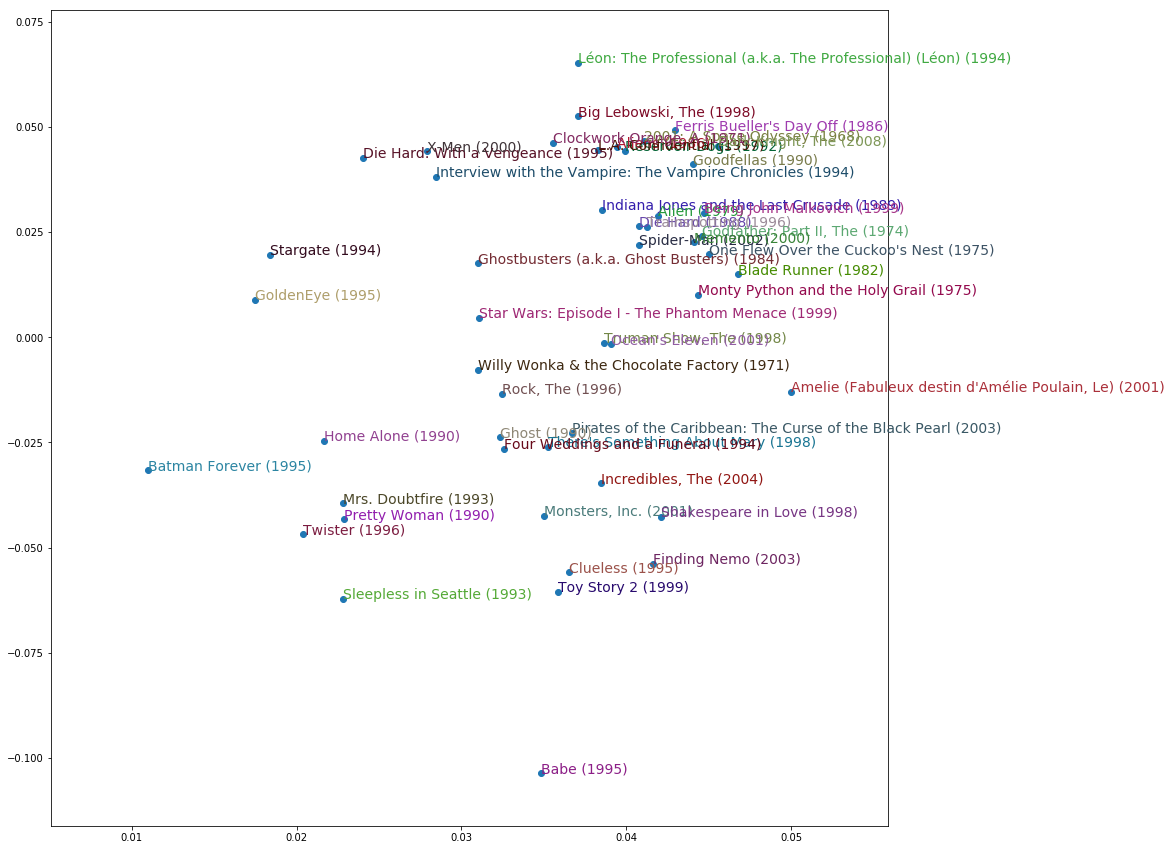

In [111]:
start=50; end=100
X = fac0[start:end]
Y = fac2[start:end]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(topMovies[start:end], X, Y):
    plt.text(x,y,movie_names[movies[i]], color=np.random.rand(3)*0.7, fontsize=14)
plt.show()

##  Neural net

Rather than creating a special purpose architecture (like our dot-product with bias earlier), it's often both easier and more accurate to use a standard neural network. Let's try it! Here, we simply concatenate the user and movie embeddings into a single vector, which we feed into the neural net.

In [112]:
user_in, u = embedding_input('user_in', n_users, n_factors, 1e-4)
movie_in, m = embedding_input('movie_in', n_movies, n_factors, 1e-4)

In [116]:
#x = merge([u, m], mode='concat')
x = concatenate([u,m])
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(70, activation='relu')(x)
x = Dropout(0.75)(x)
x = Dense(1)(x)
nn = Model([user_in, movie_in], x)
nn.compile(Adam(0.001), loss='mse')

In [117]:
nn.fit([trn.userId, trn.movieId], trn.rating, batch_size=64,epochs=8, 
          validation_data=([val.userId, val.movieId], val.rating))

Train on 80122 samples, validate on 19882 samples
Epoch 1/8
80122/80122 [==============================] - 14s 175us/step - loss: 2.4320 - val_loss: 0.8949
Epoch 2/8
80122/80122 [==============================] - 13s 165us/step - loss: 1.4543 - val_loss: 0.8946
Epoch 3/8
80122/80122 [==============================] - 14s 169us/step - loss: 1.2092 - val_loss: 0.8621
Epoch 4/8
80122/80122 [==============================] - 13s 168us/step - loss: 1.0228 - val_loss: 0.8490
Epoch 5/8
80122/80122 [==============================] - 13s 166us/step - loss: 0.9093 - val_loss: 0.8474
Epoch 6/8
80122/80122 [==============================] - 14s 173us/step - loss: 0.8437 - val_loss: 0.8405
Epoch 7/8
80122/80122 [==============================] - 13s 167us/step - loss: 0.8154 - val_loss: 0.8389
Epoch 8/8
80122/80122 [==============================] - 13s 160us/step - loss: 0.8075 - val_loss: 0.8397


This improves on our already impressive accuracy even further!